# Projeto Estatística Descritiva de Dados
## Lucas Natan Correia Couri e Mariama Oliveira

# Análise exploratória

In [184]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import researchpy as rp
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import CategoricalNB
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from IPython.core.interactiveshell import InteractiveShell
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
InteractiveShell.ast_node_interactivity = 'all'
import warnings
warnings.filterwarnings('ignore')

In [185]:
dados = pd.read_csv("dataset_stroke.csv")

In [186]:
dados.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [187]:
dados.shape

(5110, 12)

## Pré-processamento de dados

In [188]:
dados.dtypes

id                     int64
gender                object
age                  float64
hypertension           int64
heart_disease          int64
ever_married          object
work_type             object
Residence_type        object
avg_glucose_level    float64
bmi                  float64
smoking_status        object
stroke                 int64
dtype: object

Convertendos tipos "object" para "category"

In [189]:
dados['gender'] = dados['gender'].astype('category')
dados['ever_married'] = dados['ever_married'].astype('category')
dados['work_type'] = dados['work_type'].astype('category')
dados['Residence_type'] = dados['Residence_type'].astype('category')
dados['smoking_status'] = dados['smoking_status'].astype('category')
dados['hypertension'] = dados['hypertension'].astype('category')
dados['heart_disease'] = dados['heart_disease'].astype('category')
dados['stroke'] = dados['stroke'].astype('category')


In [190]:
dados.describe()

,id,age,avg_glucose_level,bmi
count,5110.000000,5110.000000,5110.000000,4909.000000
mean,36517.829354,43.226614,106.147677,28.893237
std,21161.721625,22.612647,45.283560,7.854067
min,67.000000,0.080000,55.120000,10.300000
25%,17741.250000,25.000000,77.245000,23.500000
50%,36932.000000,45.000000,91.885000,28.100000
75%,54682.000000,61.000000,114.090000,33.100000
max,72940.000000,82.000000,271.740000,97.600000


In [191]:
dados[(dados['age']<2) & (dados['stroke']==0)]

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
363,7559,Female,0.64,0,0,No,children,Urban,83.82,24.9,Unknown,0
376,22706,Female,0.88,0,0,No,children,Rural,88.11,15.5,Unknown,0
562,45238,Female,1.80,0,0,No,children,Urban,58.26,16.5,Unknown,0
564,61511,Female,0.32,0,0,No,children,Rural,73.71,16.2,Unknown,0
597,40639,Female,1.08,0,0,No,children,Rural,60.53,17.5,Unknown,0
...,...,...,...,...,...,...,...,...,...,...,...,...
4934,32147,Male,1.32,0,0,No,children,Rural,107.02,NaN,Unknown,0
5032,67426,Female,1.24,0,0,No,children,Rural,61.94,20.3,Unknown,0
5079,42709,Male,1.72,0,0,No,children,Urban,77.28,17.1,Unknown,0
5089,56714,Female,0.72,0,0,No,children,Rural,62.13,16.8,Unknown,0


Verificando outliers do IMC usando o boxplot

<AxesSubplot:>

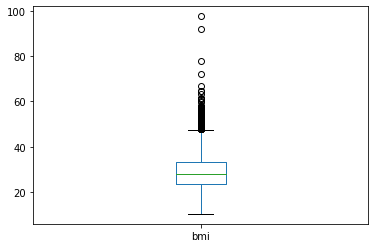

In [192]:
dados['bmi'].plot.box()

### **Verificando dados nulos**

In [193]:
dados.isnull().sum()/len(dados)

id                   0.000000
gender               0.000000
age                  0.000000
hypertension         0.000000
heart_disease        0.000000
ever_married         0.000000
work_type            0.000000
Residence_type       0.000000
avg_glucose_level    0.000000
bmi                  0.039335
smoking_status       0.000000
stroke               0.000000
dtype: float64

In [194]:
dados['gender'].value_counts() 
dados['ever_married'].value_counts()
dados['work_type'].value_counts()
dados['Residence_type'].value_counts()
dados['smoking_status'].value_counts()

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64

Yes    3353
No     1757
Name: ever_married, dtype: int64

Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64

Urban    2596
Rural    2514
Name: Residence_type, dtype: int64

never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: smoking_status, dtype: int64

In [195]:
dados[['hypertension', 'heart_disease','stroke']].apply(pd.Series.value_counts)

,hypertension,heart_disease,stroke
0,4612,4834,4861
1,498,276,249


In [196]:
dados[(dados['bmi'].isnull()) & (dados['stroke']==1)].shape

(40, 12)

In [197]:
dados[(dados['stroke']==1)].shape

(249, 12)

### Iremos retirar as instâncias que apresentam valores nulos para bmi (IMC). Futuramente, iremos comparar se caso esse atributo for inputado, o classificador apresentará uma melhor performance.

In [198]:
dados.dropna(inplace = True)

In [199]:
dados[dados.duplicated()]

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke


In [200]:
dados[ ( dados['smoking_status']=="Unknown" ) & ( dados['stroke']==1 ) ].shape

(29, 12)

In [201]:
dados = dados[dados['smoking_status']!="Unknown"]

In [202]:
dados = dados[dados['gender']!="Other"]

Número final de instâncias


In [203]:
dados.shape[0]

3425

## Discretizando variáveis contínuas

In [204]:
dados['faixaIdade'] = pd.cut(dados['age'], [0, 10, 25, 50, 75, 90])
dados['faixaIMC'] = pd.cut(dados['bmi'], [0, 18.5, 25, 30, 40, 100])
#https://www.euro.who.int/en/health-topics/disease-prevention/nutrition/a-healthy-lifestyle/body-mass-index-bmi
dados['faixaGlicose'] = pd.cut(dados['avg_glucose_level'], [0, 70, 100, 125, 300])
#https://www.who.int/data/gho/indicator-metadata-registry/imr-details/2380
dados['faixaIdade'] = dados['faixaIdade'].astype('category')
dados['faixaIMC'] = dados['faixaIMC'].astype('category')
dados['faixaGlicose'] = dados['faixaGlicose'].astype('category')


# Análise

Verificando distribuição dos atributos

In [205]:
dados[['hypertension', 'heart_disease','stroke']].apply(pd.Series.value_counts)

,hypertension,heart_disease,stroke
0,3017,3219,3245
1,408,206,180


In [206]:
dados['ever_married'].value_counts()
dados['faixaIdade'].value_counts()
dados['faixaIMC'].value_counts()
dados['faixaGlicose'].value_counts()
dados['gender'].value_counts() 
dados['heart_disease'].value_counts()
dados['hypertension'].value_counts()
dados['Residence_type'].value_counts()
dados['smoking_status'].value_counts()
dados['stroke'].value_counts()
dados['work_type'].value_counts()


Yes    2599
No      826
Name: ever_married, dtype: int64

(50, 75]    1304
(25, 50]    1299
(10, 25]     469
(75, 90]     344
(0, 10]        9
Name: faixaIdade, dtype: int64

(30.0, 40.0]     1186
(25.0, 30.0]     1093
(18.5, 25.0]      764
(40.0, 100.0]     330
(0.0, 18.5]        52
Name: faixaIMC, dtype: int64

(70, 100]     1550
(125, 300]     725
(100, 125]     642
(0, 70]        508
Name: faixaGlicose, dtype: int64

Female    2086
Male      1339
Other        0
Name: gender, dtype: int64

0    3219
1     206
Name: heart_disease, dtype: int64

0    3017
1     408
Name: hypertension, dtype: int64

Urban    1745
Rural    1680
Name: Residence_type, dtype: int64

never smoked       1852
formerly smoked     836
smokes              737
Unknown               0
Name: smoking_status, dtype: int64

0    3245
1     180
Name: stroke, dtype: int64

Private          2200
Self-employed     629
Govt_job          514
children           68
Never_worked       14
Name: work_type, dtype: int64

In [207]:
len(dados[dados.stroke == 1])/len(dados)

0.052554744525547446

[Text(0.5, 0, 'Idade'),
 Text(0, 0.5, 'Número de pessoas'),
 Text(0.5, 1.0, 'Distribuição de idades')]

[Text(0.5, 0, 'Nível médio de glicose (mg/dL)'),
 Text(0, 0.5, 'Número de pessoas'),
 Text(0.5, 1.0, 'Distribuição do nível médio de glicose')]

[Text(0.5, 0, 'IMC (kg/m²)'),
 Text(0, 0.5, 'Número de pessoas'),
 Text(0.5, 1.0, 'Distribuição do IMC')]

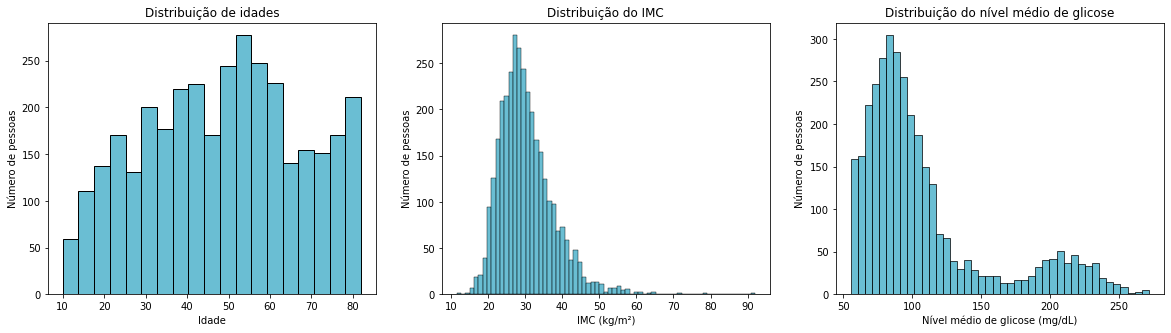

In [208]:
corGraficos = sns.color_palette("husl", 5)[3]
fig, axes = plt.subplots(1, 3, figsize=(20, 5), sharey=False)
vis1 = sns.histplot(ax = axes[0], data=dados, x="age", color=corGraficos)
vis1.set(xlabel='Idade', ylabel='Número de pessoas', title = "Distribuição de idades")
vis2 = sns.histplot(ax=axes[2], data=dados, x="avg_glucose_level", color=corGraficos)
vis2.set(xlabel='Nível médio de glicose (mg/dL)', ylabel='Número de pessoas', title = "Distribuição do nível médio de glicose")
vis3 = sns.histplot(ax = axes[1],data=dados, x="bmi", color=corGraficos)
vis3.set(xlabel='IMC (kg/m²)', ylabel='Número de pessoas', title = "Distribuição do IMC")

Text(0.5, 0.98, 'Frequência de atributos de pessoas sem AVC')

<AxesSubplot:xlabel='heart_disease', ylabel='count'>

Text(0, 0.5, 'Número de Pessoas')

Text(0.5, 0, 'Doença do coração')

[Text(0, 0, 'Não'), Text(1, 0, 'Sim')]

<AxesSubplot:xlabel='hypertension', ylabel='count'>

Text(0, 0.5, 'Número de Pessoas')

Text(0.5, 0, 'Hipertensão')

[Text(0, 0, 'Não'), Text(1, 0, 'Sim')]

<AxesSubplot:xlabel='faixaIdade', ylabel='count'>

Text(0, 0.5, 'Número de Pessoas')

Text(0.5, 0, 'Faixas de idade')

<AxesSubplot:xlabel='faixaGlicose', ylabel='count'>

Text(0, 0.5, 'Número de Pessoas')

Text(0.5, 0, 'Faixas de glicose')

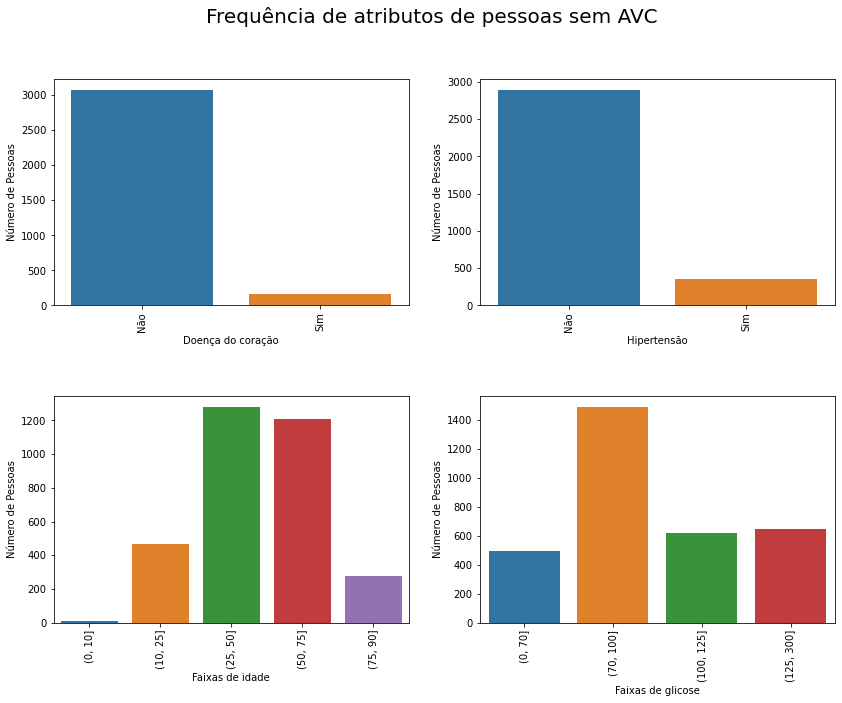

In [209]:
fig, axes = plt.subplots(2, 2, figsize=(14, 10), sharey=False)
plt.subplots_adjust(hspace = .4)
fig.suptitle("Frequência de atributos de pessoas sem AVC", fontsize=20)

sns.countplot(ax=axes[0,0], x="heart_disease", data=dados[dados['stroke']==0])
axes[0,0].tick_params(rotation=90, axis='x')
axes[0,0].set_ylabel('Número de Pessoas')
axes[0,0].set_xlabel('Doença do coração')
axes[0,0].set_xticklabels(["Não", "Sim"])

sns.countplot(ax=axes[0,1], x="hypertension", data=dados[dados['stroke']==0])
axes[0,1].tick_params(rotation=90, axis='x')
axes[0,1].set_ylabel('Número de Pessoas')
axes[0,1].set_xlabel('Hipertensão')
axes[0,1].set_xticklabels(["Não", "Sim"])

sns.countplot(ax=axes[1,0], x="faixaIdade", data=dados[dados['stroke']==0])
axes[1,0].tick_params(rotation=90, axis='x')
axes[1,0].set_ylabel('Número de Pessoas')
axes[1,0].set_xlabel('Faixas de idade')

sns.countplot(ax=axes[1,1], x="faixaGlicose", data=dados[dados['stroke']==0])
axes[1,1].tick_params(rotation=90, axis='x')
axes[1,1].set_ylabel('Número de Pessoas')
axes[1,1].set_xlabel('Faixas de glicose')

Text(0.5, 0.98, 'Frequência de atributos de pessoas com AVC')

<AxesSubplot:xlabel='heart_disease', ylabel='count'>

Text(0, 0.5, 'Número de Pessoas')

Text(0.5, 0, 'Doença do coração')

[Text(0, 0, 'Não'), Text(1, 0, 'Sim')]

<AxesSubplot:xlabel='hypertension', ylabel='count'>

Text(0, 0.5, 'Número de Pessoas')

Text(0.5, 0, 'Hipertensão')

[Text(0, 0, 'Não'), Text(1, 0, 'Sim')]

<AxesSubplot:xlabel='faixaIdade', ylabel='count'>

Text(0, 0.5, 'Número de Pessoas')

Text(0.5, 0, 'Faixas de idade')

<AxesSubplot:xlabel='faixaGlicose', ylabel='count'>

Text(0, 0.5, 'Número de Pessoas')

Text(0.5, 0, 'Faixas de glicose')

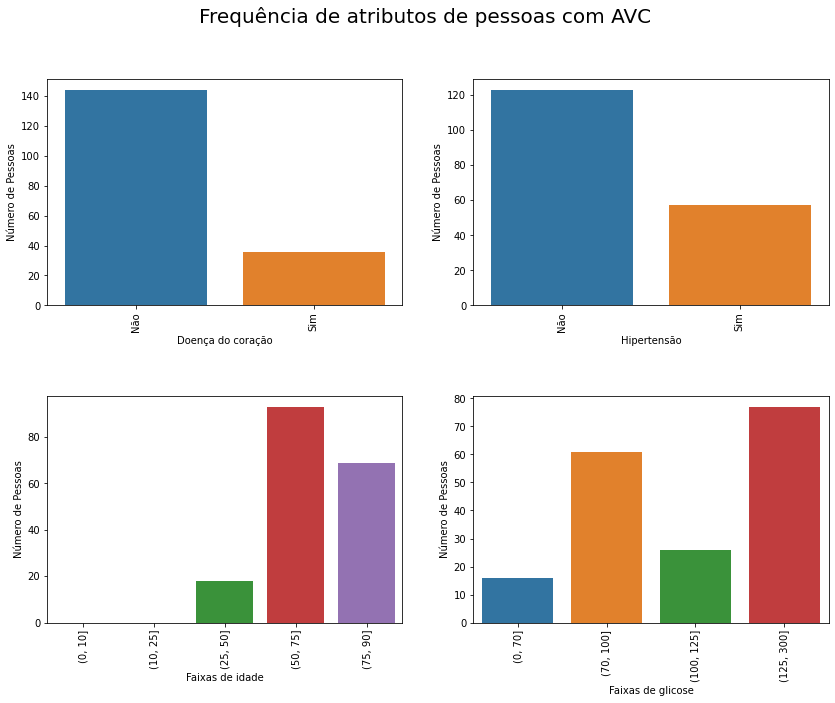

In [210]:
fig, axes = plt.subplots(2, 2, figsize=(14, 10), sharey=False)
plt.subplots_adjust(hspace = .4)
fig.suptitle("Frequência de atributos de pessoas com AVC", fontsize=20)

sns.countplot(ax=axes[0,0], x="heart_disease", data=dados[dados['stroke']==1])
axes[0,0].tick_params(rotation=90, axis='x')
axes[0,0].set_ylabel('Número de Pessoas')
axes[0,0].set_xlabel('Doença do coração')
axes[0,0].set_xticklabels(["Não", "Sim"])

sns.countplot(ax=axes[0,1], x="hypertension", data=dados[dados['stroke']==1])
axes[0,1].tick_params(rotation=90, axis='x')
axes[0,1].set_ylabel('Número de Pessoas')
axes[0,1].set_xlabel('Hipertensão')
axes[0,1].set_xticklabels(["Não", "Sim"])

sns.countplot(ax=axes[1,0], x="faixaIdade", data=dados[dados['stroke']==1])
axes[1,0].tick_params(rotation=90, axis='x')
axes[1,0].set_ylabel('Número de Pessoas')
axes[1,0].set_xlabel('Faixas de idade')

sns.countplot(ax=axes[1,1], x="faixaGlicose", data=dados[dados['stroke']==1])
axes[1,1].tick_params(rotation=90, axis='x')
axes[1,1].set_ylabel('Número de Pessoas')
axes[1,1].set_xlabel('Faixas de glicose')

Text(0.5, 1.0, 'Matriz de Correlação de Pearson')

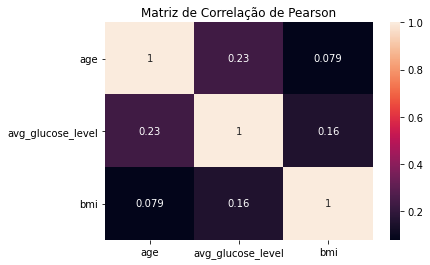

In [211]:
correlation_mat = dados.drop(columns = "id").corr()

vis4 = sns.heatmap(correlation_mat, annot = True)
vis4.set_title("Matriz de Correlação de Pearson")

plt.show()

In [212]:
varCategoricas = ['gender', 'hypertension', 'heart_disease', 'ever_married', 'work_type', 'smoking_status', 'Residence_type', 'faixaIdade', 'faixaIMC', 'faixaGlicose']

pvalores = []

for variavel in varCategoricas:
    crosstab = pd.crosstab(dados["stroke"], dados[variavel])
    pvalor = stats.chi2_contingency(crosstab)[1]
    pvalores.append(pvalor)
    print(variavel, pvalor)

gender 0.5169941898164226
hypertension 1.158585663228229e-16
heart_disease 1.915166158182386e-15
ever_married 4.114765555930653e-05
work_type 0.012797151633768608
smoking_status 0.049062271297848944
Residence_type 0.7837084243991301
faixaIdade 8.74754958846977e-48
faixaIMC 0.3078160316983966
faixaGlicose 1.277924947059737e-11


# Classificador Naive Bayes

## Com scikit

Separando em dados de treinamento e teste

In [213]:
X = dados.drop(columns='stroke')

y = dados['stroke']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)



Codificando as variáveis

In [214]:
X_trainNB = X_train
X_testNB = X_test

In [215]:
cat_columns = X_trainNB.select_dtypes(['category']).columns
X_trainNB[cat_columns] = X_trainNB[cat_columns].apply(lambda x: x.cat.codes)

cat_columns = X_testNB.select_dtypes(['category']).columns
X_testNB[cat_columns] = X_testNB[cat_columns].apply(lambda x: x.cat.codes)

X_trainNB = X_trainNB.drop(columns=["age", "bmi", "avg_glucose_level", "id"])
X_testNB = X_testNB.drop(columns=["age", "bmi", "avg_glucose_level", "id"])


In [216]:
ctgrclNB = CategoricalNB(alpha=1)
ctgrclNB.fit(X_trainNB, y_train)
ctgrclNB.predict_proba(np.array(X_testNB))

CategoricalNB(alpha=1)

array([[9.74888173e-01, 2.51118271e-02],
       [9.57908017e-01, 4.20919833e-02],
       [9.29867976e-01, 7.01320238e-02],
       ...,
       [8.70348123e-01, 1.29651877e-01],
       [9.99166819e-01, 8.33181111e-04],
       [9.93550315e-01, 6.44968529e-03]])

In [217]:
y_pred = ctgrclNB.predict(np.array(X_testNB))

### Métricas

In [218]:
f1_score(y_test, y_pred, average=None)

array([0.9592668 , 0.13043478])

In [219]:
confusion_matrix(y_test, y_pred) #tn, fp, fn, tp

array([[942,  27],
       [ 53,   6]], dtype=int64)

In [220]:
target_names = ['no stroke', 'stroke']
print(classification_report(y_test, y_pred, target_names=target_names))

              precision    recall  f1-score   support

   no stroke       0.95      0.97      0.96       969
      stroke       0.18      0.10      0.13        59

    accuracy                           0.92      1028
   macro avg       0.56      0.54      0.54      1028
weighted avg       0.90      0.92      0.91      1028



## Sem scikit

In [221]:
trainNB = X_trainNB
trainNB['stroke'] = y_train
#trainNB.head()

In [222]:
def calculoProbCond(entradaTestar, conjuntoTreino):
    
    arrayProbabilidades = [[],[]]
    for nomeColuna in conjuntoTreino.columns: #exceto stroke?

        if nomeColuna!="stroke":   
            valorTestar = entradaTestar[nomeColuna] #Ver se precisa passar o valor da linha (0)
 
            atributoNao = len(conjuntoTreino[(conjuntoTreino[nomeColuna]==valorTestar)&(conjuntoTreino['stroke']==0)]) / len(conjuntoTreino[conjuntoTreino['stroke']==0])
            atributoSim = len(conjuntoTreino[(conjuntoTreino[nomeColuna]==valorTestar)&(conjuntoTreino['stroke']==1)]) / len(conjuntoTreino[conjuntoTreino['stroke']==1])

            arrayProbabilidades[0].append(atributoNao)
            arrayProbabilidades[1].append(atributoSim)

    return arrayProbabilidades




In [223]:
def calculoProbabilidadePred(listaProbabilidades, conjuntoTreino):

    Likelihood0 = np.prod(listaProbabilidades[0])
    Likelihood1 = np.prod(listaProbabilidades[1])

    ProbStroke0 = len(conjuntoTreino[conjuntoTreino['stroke']==0])/len(conjuntoTreino)
    ProbStroke1 = len(conjuntoTreino[conjuntoTreino['stroke']==1])/len(conjuntoTreino)


    ProbTotal = (ProbStroke0*Likelihood0) + (ProbStroke1*Likelihood1)

    probNao = (ProbStroke0*Likelihood0)/ProbTotal
    probSim = (ProbStroke1*Likelihood1)/ProbTotal
    return 0 if probNao>probSim else 1

In [224]:
##Iterar sobre a base de teste
def predictStroke(conjuntoTreino, conjuntoTeste) :

    arrayPred = []
    for index, linha in conjuntoTeste.iterrows():
        resposta = calculoProbCond(linha, conjuntoTreino)
        predicao = calculoProbabilidadePred(resposta, conjuntoTreino)
        arrayPred.append(predicao)
   
    return arrayPred

In [225]:
pred_Y  =  predictStroke(trainNB, X_test)


### Métricas

In [226]:
accuracy_score(y_test, pred_Y)

0.9221789883268483

In [227]:
f1_score(y_test, pred_Y, average=None)

array([0.9592668 , 0.13043478])

In [228]:
confusion_matrix(y_test, pred_Y) #tn, fp, fn, tp f1=tp/tp+1/2(fp+fn) f0=942/942+1/2(27+53) e f1=6/6+1/2(27+53)

array([[942,  27],
       [ 53,   6]], dtype=int64)

In [229]:
target_names = ['no stroke', 'stroke']
print(classification_report(y_test, pred_Y, target_names=target_names))

              precision    recall  f1-score   support

   no stroke       0.95      0.97      0.96       969
      stroke       0.18      0.10      0.13        59

    accuracy                           0.92      1028
   macro avg       0.56      0.54      0.54      1028
weighted avg       0.90      0.92      0.91      1028



## KNN

In [230]:
X_trainKN = X_train.drop(columns = ["faixaIdade", "faixaIMC", "faixaGlicose", "id"])
X_testKN = X_test.drop(columns = ["faixaIdade", "faixaIMC", "faixaGlicose", "id"])

In [231]:
train_dummies = pd.get_dummies(X_trainKN[["work_type", "smoking_status"]].astype(str))
test_dummies = pd.get_dummies(X_testKN[["work_type", "smoking_status"]].astype(str))

In [232]:
X_trainKN = X_trainKN.join(train_dummies)
X_testKN = X_testKN.join(test_dummies)

In [233]:
knnClassifier = KNeighborsClassifier(n_neighbors=1)
knnClassifier.fit(X_trainKN, y_train)
pred_KN = knnClassifier.predict(X_testKN)


KNeighborsClassifier(n_neighbors=1)

### Métricas

In [234]:
f1_score(y_test, pred_KN, average=None)

array([0.95213587, 0.17699115])

In [235]:
accuracy_score(y_test, pred_KN)

0.9095330739299611

In [236]:
confusion_matrix(y_test, pred_KN) #tn, fp, fn, tp

array([[925,  44],
       [ 49,  10]], dtype=int64)

In [237]:
target_names = ['no stroke', 'stroke']
print(classification_report(y_test, pred_KN, target_names=target_names))

              precision    recall  f1-score   support

   no stroke       0.95      0.95      0.95       969
      stroke       0.19      0.17      0.18        59

    accuracy                           0.91      1028
   macro avg       0.57      0.56      0.56      1028
weighted avg       0.91      0.91      0.91      1028



# Experimento balanceamento (sugerido pelo professor)

In [238]:
avcSim = dados[dados['stroke']==1]
avcNao = dados[dados['stroke']==0]
avcNao = avcNao.sample(frac=0.0555, replace=False, random_state=195)

In [239]:
len(avcNao)
len(avcSim)

180

180

Base balanceada (180 sim e 180 nao) 

In [240]:
balanceado = avcSim.append(avcNao)

Base de validação (o que sobrou)

In [241]:
validation = dados[~dados.index.isin(balanceado.index)]

In [242]:
yv_testNB = validation['stroke']
Xv_testNB = validation.drop(columns="stroke")


cat_columnsv = Xv_testNB.select_dtypes(['category']).columns
Xv_testNB[cat_columnsv] = Xv_testNB[cat_columnsv].apply(lambda x: x.cat.codes)

Xv_testNB = Xv_testNB.drop(columns=["age", "bmi", "avg_glucose_level", "id"])

In [243]:
Xb = balanceado.drop(columns='stroke')

yb = balanceado['stroke']

Xb_train, Xb_test, yb_train, yb_test = train_test_split(Xb, yb, test_size=0.3, random_state=42)


## Naive Bayes (sem scikit) com dados balanceados

In [244]:
Xb_trainNB = Xb_train
Xb_testNB = Xb_test

cat_columnsb = Xb_trainNB.select_dtypes(['category']).columns
Xb_trainNB[cat_columnsb] = Xb_trainNB[cat_columnsb].apply(lambda x: x.cat.codes)

cat_columnsb = Xb_testNB.select_dtypes(['category']).columns
Xb_testNB[cat_columnsb] = Xb_testNB[cat_columnsb].apply(lambda x: x.cat.codes)

Xb_trainNB = Xb_trainNB.drop(columns=["age", "bmi", "avg_glucose_level", "id"])
Xb_testNB = Xb_testNB.drop(columns=["age", "bmi", "avg_glucose_level", "id"])

In [245]:
btrainNB = Xb_trainNB
btrainNB['stroke'] = yb_train

In [246]:
predb_Y  =  predictStroke(btrainNB, Xb_test)

### Métricas

In [247]:
target_names = ['no stroke', 'stroke']
print(classification_report(yb_test, predb_Y, target_names=target_names))

              precision    recall  f1-score   support

   no stroke       0.73      0.68      0.71        53
      stroke       0.71      0.76      0.74        55

    accuracy                           0.72       108
   macro avg       0.72      0.72      0.72       108
weighted avg       0.72      0.72      0.72       108



In [248]:
f1_score(yb_test, predb_Y, average=None)
accuracy_score(yb_test, predb_Y)

array([0.70588235, 0.73684211])

0.7222222222222222

In [249]:
confusion_matrix(yb_test, predb_Y) #tn, fp, fn, tp 

array([[36, 17],
       [13, 42]], dtype=int64)

De fato trabalhar com a base balanceada melhorou os resultados! Perdemos acurácia (0,72) mas ganhamos no f1-score (0,74)

### Testando na base de validação (o que sobrou)

In [250]:
valid_Y  =  predictStroke(btrainNB, Xv_testNB)

In [251]:
target_names = ['no stroke', 'stroke']
print(classification_report(yv_testNB, valid_Y, target_names=target_names))
accuracy_score(yv_testNB, valid_Y)

              precision    recall  f1-score   support

   no stroke       1.00      0.67      0.80      3065
      stroke       0.00      0.00      0.00         0

    accuracy                           0.67      3065
   macro avg       0.50      0.33      0.40      3065
weighted avg       1.00      0.67      0.80      3065



0.665252854812398

In [252]:
confusion_matrix(yv_testNB, valid_Y) #tn, fp, fn, tp

array([[2039, 1026],
       [   0,    0]], dtype=int64)

## Knn com dados balanceados

In [261]:
Xb_trainKN = Xb_train.drop(columns = ["faixaIdade", "faixaIMC", "faixaGlicose", "id"])
Xb_testKN = Xb_test.drop(columns = ["faixaIdade", "faixaIMC", "faixaGlicose", "id"])
train_dummiesb = pd.get_dummies(Xb_trainKN[["work_type", "smoking_status"]].astype(str))
test_dummiesb = pd.get_dummies(Xb_testKN[["work_type", "smoking_status"]].astype(str))
Xb_trainKN = Xb_trainKN.join(train_dummiesb)
Xb_testKN = Xb_testKN.join(test_dummiesb)

In [262]:
yv_testKN = validation['stroke']
Xv_testKN = validation.drop(columns="stroke")


cat_columnsv = Xv_testKN.select_dtypes(['category']).columns
Xv_testKN[cat_columnsv] = Xv_testKN[cat_columnsv].apply(lambda x: x.cat.codes)

Xv_testKN = Xv_testKN.drop(columns = ["faixaIdade", "faixaIMC", "faixaGlicose", "id"])
test_dummiesc = pd.get_dummies(Xv_testKN[["work_type", "smoking_status"]].astype(str))
Xv_testKN = Xv_testKN.join(test_dummiesc)


In [263]:
btrainKNN = Xb_trainKN
btrainKNN['stroke'] = yb_train

In [277]:
knnClassifier = KNeighborsClassifier(n_neighbors=5)
knnClassifier.fit(Xb_trainKN, yb_train)
pred_KNb = knnClassifier.predict(Xb_testKN)

KNeighborsClassifier()

### Métricas

In [278]:
f1_score(yb_test, pred_KNb, average=None)
accuracy_score(yb_test, pred_KNb)
confusion_matrix(yb_test, pred_KNb) #tn, fp, fn, tp
target_names = ['no stroke', 'stroke']
print(classification_report(yb_test, pred_KNb, target_names=target_names))


array([0.7047619 , 0.72072072])

0.7129629629629629

array([[37, 16],
       [15, 40]], dtype=int64)

              precision    recall  f1-score   support

   no stroke       0.71      0.70      0.70        53
      stroke       0.71      0.73      0.72        55

    accuracy                           0.71       108
   macro avg       0.71      0.71      0.71       108
weighted avg       0.71      0.71      0.71       108



### Testando na base de validação (tudo stroke=0):

In [258]:
Xb_trainKN['work_type_1'] = 0

In [259]:
knnClassifier = KNeighborsClassifier(n_neighbors=5)
knnClassifier.fit(Xb_trainKN, yb_train)
pred_KNv = knnClassifier.predict(Xv_testKN)


KNeighborsClassifier()

### Métricas

In [260]:
f1_score(yv_testKN, pred_KNv, average=None)
accuracy_score(yv_testKN, pred_KNv)
confusion_matrix(yv_testKN, pred_KNv) #tn, fp, fn, tp
target_names = ['no stroke', 'stroke']
print(classification_report(yv_testKN, pred_KNv, target_names=target_names))


array([0.80436903, 0.        ])

0.6727569331158239

array([[2062, 1003],
       [   0,    0]], dtype=int64)

              precision    recall  f1-score   support

   no stroke       1.00      0.67      0.80      3065
      stroke       0.00      0.00      0.00         0

    accuracy                           0.67      3065
   macro avg       0.50      0.34      0.40      3065
weighted avg       1.00      0.67      0.80      3065

